# Assignment 1
This assignment consists of 14 exercises divided over two notebooks. Each exercise will come with some tests that are used to verify whether your code is correct. If you pass these tests then you are rewarded *full points*; if your code fails then you will get *no points*. Make sure to **read the rules** before you start the assignment.

## Rules
For this assignment the following rules apply:

**General**
 * The assignment should be completed in **groups of three** (enroll in a group on Brightspace).
 * Any kind of intergroup discussion will be considered fraud and both the parties will be punished.
 * All code must be written intra group. All external help, with the exception of Python/library documentation and the lecture slides, will be considered fraud.
 * Your solutions should be general. E.g., do not assume that the input always has the same shape.
 * Do not use libraries that implement the assignment for you (e.g. don't use `cv2.cvtColor` to do color to gray conversion).

**Grading**
 * Each exercise comes with (hidden) tests. These tests will check your solution for various (unseen) inputs.
 * If the (hidden) tests pass without error (warnings are allowed) then you receive full points.
 * If the (hidden) tests fail or throw an error for any reason then you receive 0 points.
  * If a test cell takes more than five minutes to complete then this is considered an error.
  * Your grade is computed as $\frac{\text{points}}{\text{max_points}} * 9 + 1$ and will be rounded to the closest 0.5 point.
 * Submit your code to Brightspace as a zip file containing only the notebook (`*.ipynb`) files.
 * **Do not rename the notebook files**
 
**Late Submissions**
 * Late submissions must be submitted *as soon as possible* to the "Assignment 1 - Late Submissions" assignment on Brightspace.
 * The following penalty will be applied: $\text{adjusted grade} = \text{grade} - 1 - \lceil\frac{\text{minutes late}}{10}\rceil$

<br />
 
**Before you submit**, make sure that you are not accidentaly using any global variables. Restart the kernel (wiping all global variables) and run the code from top to bottom by clicking "Kernel" => "Restart & Run all" in the menu bar at the top.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import os
import sys
sys.path.append("../../")
import helpers

# Load a image, resize (optional) and convert it to a normalized floating point format (map values between 0.0 and 1.0).
#image = helpers.imread_normalized_float("name_of_image_file.png")

# Show a single image
#helpers.show_image(image, "Text above image")
    
# Showing multiple images in a grid (with a given number of rows and columns):
# helpers.show_images({"Text above figure1": figure1, "Text above figure2": "figure2"}, nrows, ncols)

## Color Images
Light consists of a combination of electromagnatic waves at different wave lengths. Our eyes can capture a part of this spectrum using "cones" which capture short, medium, and long wavelengths. These absorption spectra map to roughly red, green, and blue respectively. Hence, the colors of pixels are typically stored as a combination of red, green, and blue.

interactive(children=(FloatSlider(value=1.0, description='Red', max=1.0), FloatSlider(value=1.0, description='…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
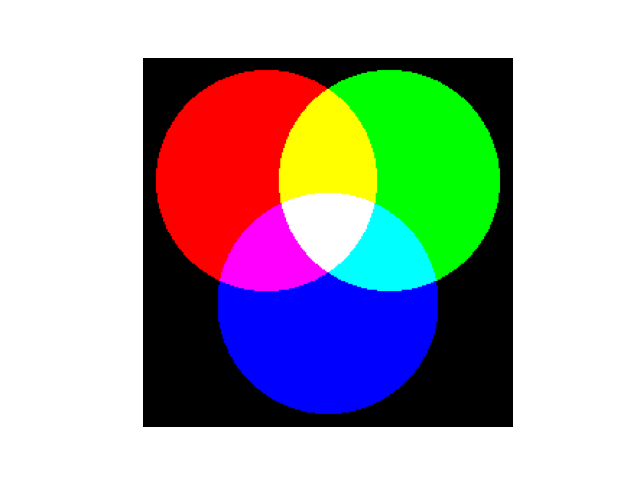

In [2]:
import color_spaces
color_spaces.draw_rgb_circle_diagram(256)

## Exercise 1 (1 point)
RGB (Red, Green, Blue) maps nicely to the human visual system. However, for image progressing we sometimes prefer other color spaces such as YIQ which separate color from luminance. The formula to convert from RGB to YIQ is as follows:
$$
\begin{bmatrix}
Y \\
I \\
Q
\end{bmatrix}
=
\begin{bmatrix}
0.299 & 0.587 & 0.114 \\
0.595716 & -0.274453 & -0.321263 \\
0.211456 & -0.522591 & 0.311135
\end{bmatrix}
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
$$


Your job is to implement a function which converts any image from RGB to the YIQ color space.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
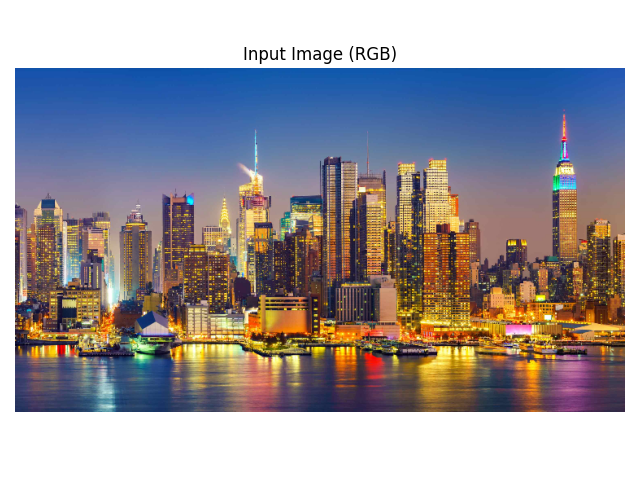

YOUR SOLUTION:


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
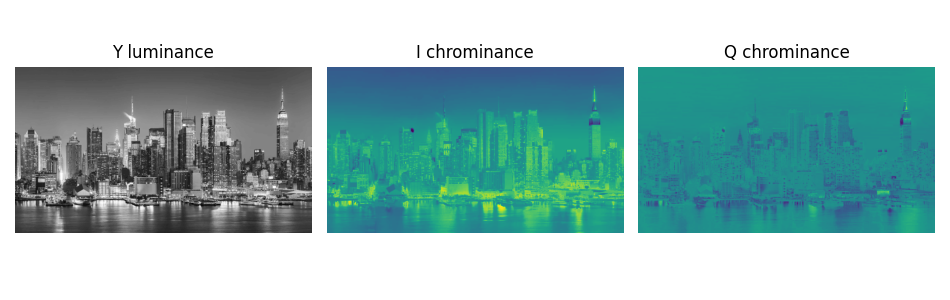

In [3]:
def rgb_to_yiq(image):
    out = np.empty(image.shape)
    matrix = np.array([
        [0.299, 0.587, 0.114],
        [0.595716, -0.274453, -0.321263],
        [0.211456, -0.522591, 0.311135]
    ])
    
    out = np.dot(image, matrix.T.copy())
    return out

new_york_image = helpers.imread_normalized_float(os.path.join(helpers.dataset_folder, "week1", "rework", "newyork.jpg"), 0.25) # Downscale by 4 in each direction = 16 times less pixels.
new_york_image_yiq = rgb_to_yiq(new_york_image)

helpers.show_image(new_york_image, "Input Image (RGB)")

print("YOUR SOLUTION:")
fig, axis = plt.subplots(1,3, figsize=(9.5, 3))
plot_names = ["Y luminance", "I chrominance", "Q chrominance"]
for i, ax in enumerate(axis):
    ax.set_title(plot_names[i])
    ax.imshow(new_york_image_yiq[:,:,i], cmap=("gray" if i==0 else "viridis"))
    ax.axis("off")
fig.tight_layout()

### Testing your solution of exercise 1
The grading tests for this solution are hidden. However, you should be able to get a good idea of whether the code is doing what you expect it to do by comparing the results to that you work out by hand. For a complicated image this is hard, so we provide a small test "image" that you can use. Do not worry if the results of your function are off by a very tiny amount ($<0.0001$), this is to be expected due to the limited precision with which computers can represent floating point numbers.

*You are free to modify the provided tests in any way you want. They are not part of the grading*

In [4]:
test_image = np.array([[
    [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [0, 1, 1], [1, 1, 1]
]])
yiq_image = rgb_to_yiq(test_image)

np.set_printoptions(precision=3) # Print at most 3 decimals
for i in range(test_image.shape[1]):
    rgb = test_image[:,i,:]
    yiq = yiq_image[:,i,:]
    print(f"RGB: {rgb}")
    print(f"YIQ: {yiq}")
    print("")

RGB: [[0 0 0]]
YIQ: [[0. 0. 0.]]

RGB: [[1 0 0]]
YIQ: [[0.299 0.596 0.211]]

RGB: [[0 1 0]]
YIQ: [[ 0.587 -0.274 -0.523]]

RGB: [[0 0 1]]
YIQ: [[ 0.114 -0.321  0.311]]

RGB: [[1 1 0]]
YIQ: [[ 0.886  0.321 -0.311]]

RGB: [[0 1 1]]
YIQ: [[ 0.701 -0.596 -0.211]]

RGB: [[1 1 1]]
YIQ: [[ 1.000e+00  0.000e+00 -5.551e-17]]



# Contrast
You might be familiar with the various filters on your phone that make the colors in your images stand out more. These filters do so by increasing the contrast of the image. Contrast is defined as the difference between the pixel with the lowest and the pixel with the highest intensity. Let's consider the image of this car for example. The "colors" (this is in gray scale) are washed out: the image has a low contrast.

Another way we can reason about the contrast of an image is by examining the intensity histogram. A histogram is a collection of bins, each of which stores the frequency of occurances of a certain value range. In the case of images, the values are a color or intensity; so a histogram tells us for each bin how many pixels have an intensity within that range. Next to the car we have plotted a  histogram of the image. Notice how almost all pixels have an intensity between 0.3 and 0.7. The contrast is thus only $0.7-0.3=0.4$.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
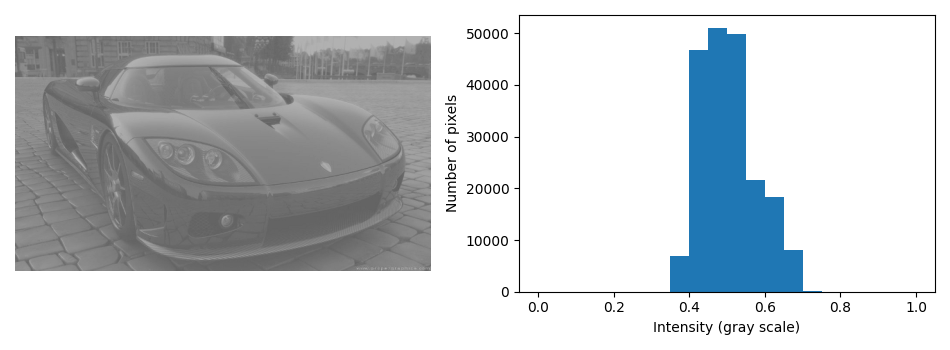

In [5]:
car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=helpers.default_fig_size)
ax1.imshow(car_image, cmap="gray", vmin=0, vmax=1)
ax1.set_axis_off()
ax2.hist(car_image.flatten(), 20, range=(0, 1))
ax2.set_xlabel("Intensity (gray scale)")
ax2.set_ylabel("Number of pixels")
plt.tight_layout()
plt.show()

## Exercise 2 (1 point)
A simple way to increase the contract of an image is through Automatic Contrast Adjustment. Automatic Contrast Adjustment "stretches" the contrast by linearly interpolating the intensity values such that the new min/max intensity of the image lies inside a new target range. Implement a function that stretches the contrast such that the new intensities range from/to the given minimum/maximum values.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
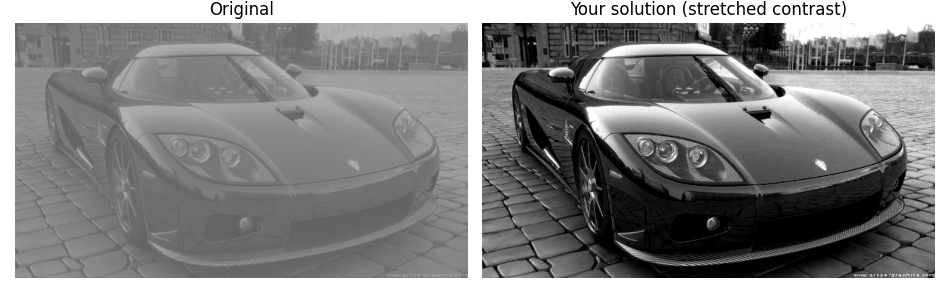

In [6]:
def constrast_stretch(gray_image, target_minimum_intensity, target_maximum_intensity):
    new_image = np.zeros(gray_image.flatten().shape)

    lo = np.min(gray_image)
    hi = np.max(gray_image)

    new_image = target_minimum_intensity + (target_maximum_intensity - target_minimum_intensity)/(hi-lo) * (gray_image-lo)
    new_image = np.clip(new_image, 0, 1)
    return new_image

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))
car_image_stretched = constrast_stretch(car_image, -0.2, 1.2)
helpers.show_images({ "Original": car_image, "Your solution (stretched contrast)": car_image_stretched }, nrows=1, ncols=2)

### Testing your solution of exercise 2
You can verify whether you think your solution is working by analyzing the histogram of the output image for different minimum/maximum target intensities. Do the results match your expectation?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
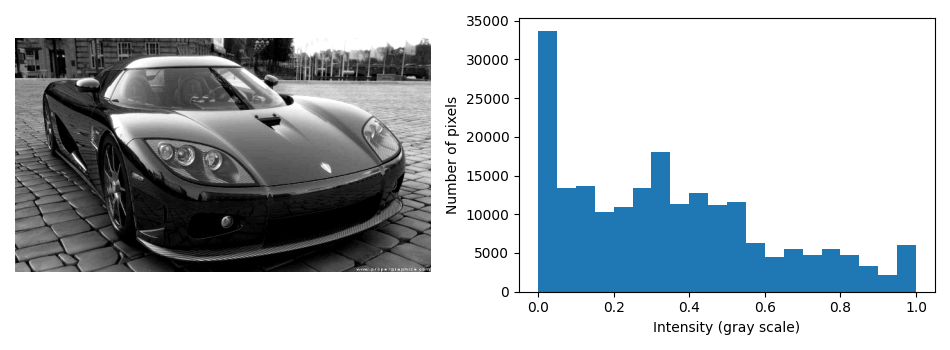

In [7]:
target_minimum_intensity = -0.2
target_maximum_intensity = 1.2

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "car.png"))
car_image_stretched = constrast_stretch(car_image, target_minimum_intensity, target_maximum_intensity)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=helpers.default_fig_size)
ax1.imshow(car_image_stretched, cmap="gray", vmin=0, vmax=1)
ax1.set_axis_off()
ax2.hist(car_image_stretched.flatten(), 20)
ax2.set_xlabel("Intensity (gray scale)")
ax2.set_ylabel("Number of pixels")
plt.tight_layout()
plt.show()

## Exercise 3 (1 point)
In a real application contrast enhancement should work without the intervention of the user. A naive approach would be to always map the input image to a range of $0.0$ and $1.0$. However, this fails in cases where the input image already has a couple of pixels that reach close to $0.0$ and $1.0$. These pixels are not representative of the whole image but prevent proper stretching with the naive approach.

Modified Auto-Contrast tries to alleviate this issue by "saturating" a fixed percentage ($p_\text{lo}, p_\text{hi}$) of pixels at the lower and upper ends respectively. To accomplish this, we need to determine two limiting values $a'_\text{lo}$ and $a'_\text{hi}$ such that the predefined quantile of pixels $p_\text{lo}$ are smaller than $a'_\text{lo}$ and another quantile $p_\text{hi}$ of the values are greater than $a'_\text{hi}$.

Implement the auto contrast function described above. You can use `np.percentile` to help you compute $a'_\text{lo}$ and $a'_\text{hi}$.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
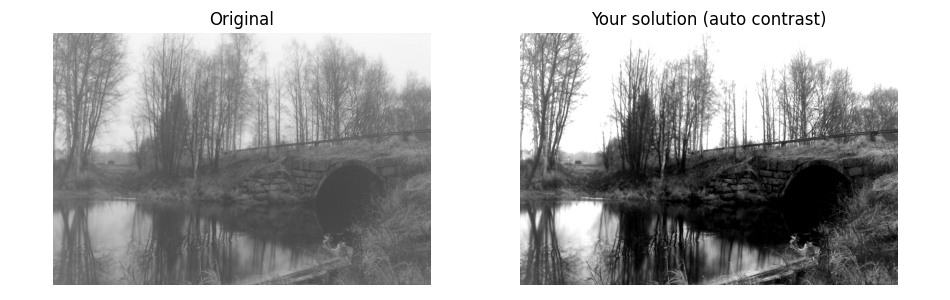

In [8]:
def auto_contrast(gray_image, p_lo, p_hi):
    lo = np.percentile(gray_image, p_lo)
    hi = np.percentile(gray_image, 100-p_hi)
    
    half_edited = np.clip(gray_image, lo, hi)
    new_image = constrast_stretch(half_edited, 0, 1)
    return new_image

car_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "colors", "bridge.png"))
car_image_stretched = auto_contrast(car_image, 5, 20)
helpers.show_images({ "Original": car_image, "Your solution (auto contrast)": car_image_stretched }, nrows=1, ncols=2)

### Testing your solution of exercise 3
A good way to verify your solution is by creating a very simple test input (e.g., as provided for exercise 1) and checking the resulting histogram. Try to come up with an easy test case to verify whether your solution is correct.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
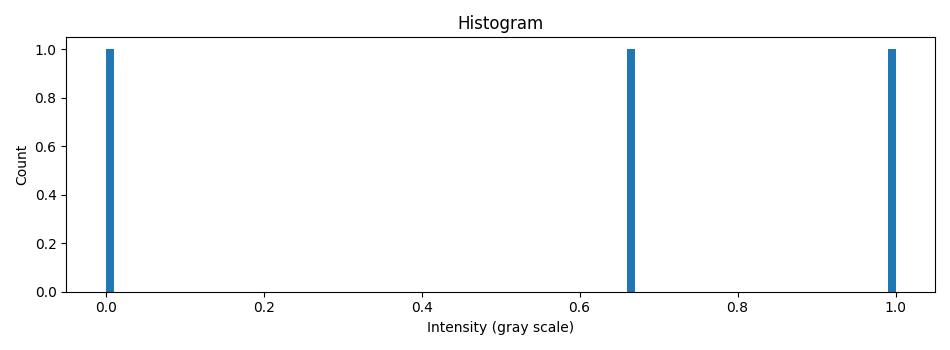

In [9]:
input_image = np.array([22, 4, 16]) # REPLACE THIS WITH YOUR TEST INPUT
output_image = auto_contrast(input_image, 10, 10)

fig, ax = plt.subplots(1, 1, figsize=helpers.default_fig_size)
ax.set_title("Histogram")
ax.hist(output_image, 100)
ax.set_xlabel("Intensity (gray scale)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

# Image Filters
Apart from very simple per-pixel operations (such as color inversion) we can also design filters that take into account a neighbourhood around a pixel. A popular way of formulating and applying these filters is through the use of the convolution operator. The convolution operator applies a weighted sum to the surrounding pixels for each output pixel. The weights of the weighted sum are organized in an array (called kernel). The kernel is centered around the pixel that is currently computed (hence the size of the kernel should always be uneven) - compare the slides on box filtering.

## Exercise 4 (1 point)
The basic Laplace filter computes the differences between a central pixel and the weighted average of the neighboring pixels. This difference, multiplied by some weight, can be added or subtracted from the original image to smooth or sharpen the image respectively.

Implement the two functions that smoothen or sharpen the input image using the Laplace filter with the given weight. Use `scipy.signal.convolve2d(image, kernel, mode="same")` to apply your convolution. More information on the Laplace filter can be found in the lecture slides.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
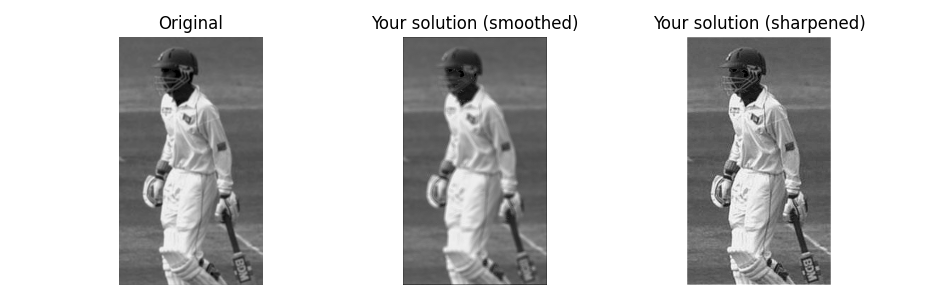

In [10]:
def laplace_smooth(gray_image, weight):
    
    laplace = weight * np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    I = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ])
    kernel = I + laplace
    return scipy.signal.convolve2d(gray_image, kernel, mode="same")

def laplace_sharpen(gray_image, weight):
    laplace = weight * np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])

    I = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ])
    kernel = I - laplace
    return scipy.signal.convolve2d(gray_image, kernel, mode="same")
    
    
cricket_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "blurry.png"))
smoothed_image = laplace_smooth(cricket_image, 5)
sharpened_image = laplace_sharpen(cricket_image, 5)
helpers.show_images({
    "Original": cricket_image,
    "Your solution (smoothed)": smoothed_image,
    "Your solution (sharpened)": sharpened_image
}, nrows=1, ncols=3)

In [11]:
cricket_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "blurry.png"))
smoothed_image = laplace_smooth(cricket_image, 5)
sharpened_image = laplace_sharpen(cricket_image, 5)
assert(smoothed_image.shape == cricket_image.shape)
assert(sharpened_image.shape == cricket_image.shape)


## Separable Convolution
Linear convolution filters can become quite expensive to execute because their performance grows with the filter size. In 2D this means that if we double the horizontal & vertical resolution then we quadrupal the number of operations required to execute the filter.

Some convolution filters are separable, meaning that they can be separated into a vertical and horizontal component. For this we use of the associative property of convolution, namely that: $(a \circledast b) \circledast c = a \circledast (b \circledast c)$. In this case the kernel can be decomposed as the result of a convolution of a horizontal and vertical (1D) kernel. Applying these two 1D kernels to the original input dataset ($a$ in the previous example) will give the same result as applying a convolution with the full 2D kernel.

The performance advantage comes from the fact that a $MxN$ kernel is now decomposed into a $Mx1$ and $1xN$ kernel. This reduces the number of operations that need to be performed per pixel from $M \cdot N$ to $M + N$.

### Exercise 5 (1 point)
Break down the following (separable) 2D convolution kernel into a horizontal and vertical component. The result of convolution with those two 1D kernels should be the same as a convolution with the 2D kernel.
$$
\begin{bmatrix}
1 & 2 & 3 & 2 & 1 \\
3 & 6 & 9 & 6 & 3 \\
2 & 4 & 6 & 4 & 2 \\
1 & 2 & 3 & 2 & 1 \\
3 & 6 & 9 & 6 & 3
\end{bmatrix}
$$

In [22]:
horizontal_kernel = np.array([
    [1, 2, 3, 2, 1]
])
vertical_kernel = np.array([
    [1],
    [3],
    [2],
    [1],
    [3],
])



### Testing your solution of exercise 5
A convolution with the 1D kernels should result in the same output as a single convolution with the 2D kernels.

In [23]:
assert(horizontal_kernel.shape == (1, 5))
assert(vertical_kernel.shape == (5, 1))
horizontal_kernel * vertical_kernel

array([[1, 2, 3, 2, 1],
       [3, 6, 9, 6, 3],
       [2, 4, 6, 4, 2],
       [1, 2, 3, 2, 1],
       [3, 6, 9, 6, 3]])

## Non-linear filters
With convolutions we can easily express and apply linear filters. However, not all image filters are linear. An example of a non-linear filters are the minimum, maximum and median filters. As the names suggest, these filters return the minimum, maximum and median values of the region of $NxN$ pixels surrounding the center pixel. The median filter is an effective way of removing "salt and pepper" from images.

To prevent confusion, the following image demonstrates a the size of a $3x3$ filter (red border) around the center pixel (blue). Your solution should work for any filter size of $NxN$ where $N$ is an odd number.

<div>
<img src="filter_3x3.png" width="50%"/>
</div>

### Exercise 6 (2 points)
Implement the filters that compute the mimimum, maximum and median values respectively inside the $N x N$ region surrounding each pixel. You may assume that the functions will only be called for odd values of $N$. You do not need to handle the case where $N$ is even.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
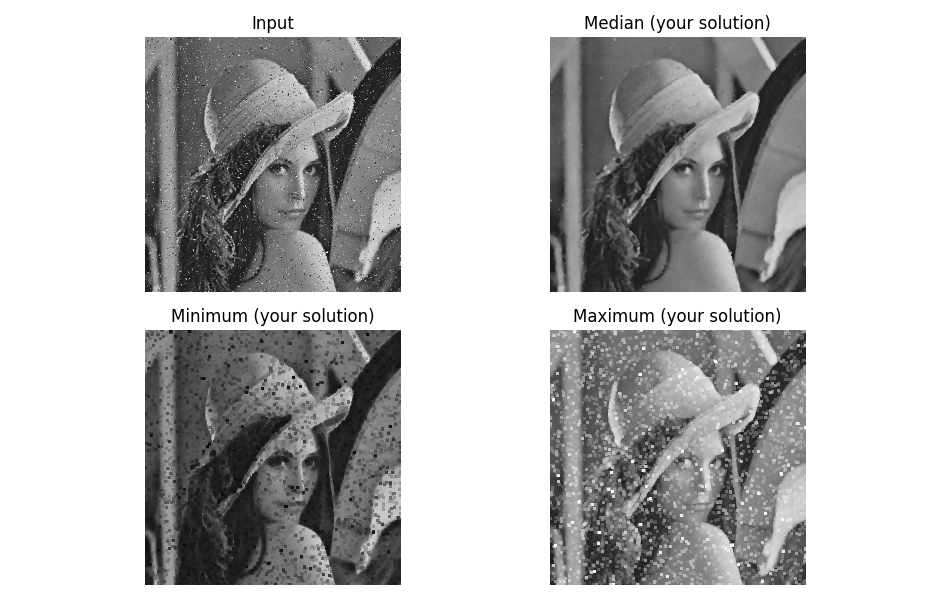

In [38]:
def minimum_filter(gray_image, N):
    out = gray_image.copy()
    mid = N // 2
    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            out[y, x] = np.min(gray_image[max(0, y-mid):y+mid+1, max(0, x-mid):x+mid+1])
    return out

def maximum_filter(gray_image, N):
    out = gray_image.copy()
    mid = N // 2
    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            out[y, x] = np.max(gray_image[max(0, y-mid):y+mid+1, max(0, x-mid):x+mid+1])
    return out

def median_filter(gray_image, N):
    out = gray_image.copy()
    mid = N // 2
    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            out[y, x] = np.median(gray_image[max(0, y-mid):y+mid+1, max(0, x-mid):x+mid+1])
    return out

lena_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "lena_salt_pepper.png"), scale=0.5)
minimum_image = minimum_filter(lena_image, 3)
maximum_image = maximum_filter(lena_image, 3)
median_image = median_filter(lena_image, 3)
helpers.show_images({
    "Input": lena_image,
    "Median (your solution)": median_image,
    "Minimum (your solution)": minimum_image,
    "Maximum (your solution)": maximum_image
}, nrows=2, ncols=2)

### Testing your solution of exercise 6
We provide a couple of basic tests to verify that your functions return images of the correct size and that they don't accidentaly modify the input image. There are two hidden test cells which. The first will test minimum/maximum filters (1 point) and the second tests the median filter (1 point).

You can add your own tests in the top code cell. Again: try to thing of a couple of very simple test cases that you can verify by hand.

In [ ]:
# Add any additional tests you want to perform here

In [39]:
input_image = helpers.imread_normalized_float_grayscale(os.path.join(helpers.dataset_folder, "week1", "rework", "lena_salt_pepper.png"), scale=0.5)
input_image_copy = input_image.copy()
minimum_image = minimum_filter(lena_image, 5)
maximum_image = maximum_filter(lena_image, 5)
median_image = minimum_filter(lena_image, 5)
assert(helpers.SSD_per_pixel(input_image, input_image_copy) == 0.0) # Your function should not modify the input image
assert(input_image.shape == minimum_image.shape)
assert(input_image.shape == maximum_image.shape)
assert(input_image.shape == median_image.shape)